### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'
dados_completos = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
faturamento = dados_completos.groupby('Loja')['Preço'].sum().sort_values(ascending=False)
print("Faturamento por Loja:")
print(faturamento)

Faturamento por Loja:
Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


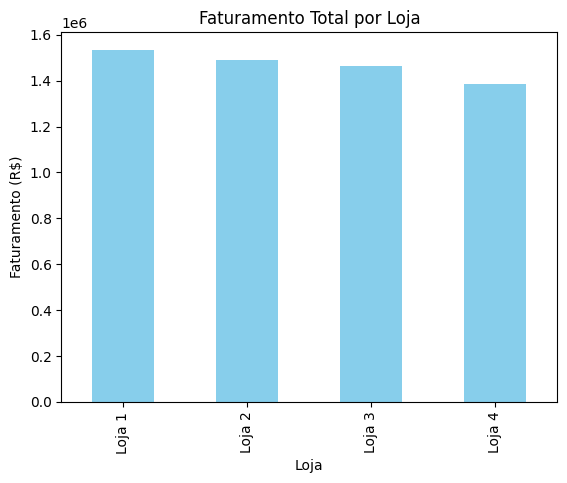

In [ ]:
import matplotlib.pyplot as plt
faturamento.plot(kind='bar', color='skyblue', title='Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.show()

# 2. Vendas por Categoria


In [ ]:
categorias = dados_completos['Categoria do Produto'].value_counts()
print("\nCategorias Mais Vendidas:")
print(categorias.head())


Categorias Mais Vendidas:
Categoria do Produto
moveis              1886
eletronicos         1772
brinquedos          1290
eletrodomesticos    1149
esporte e lazer     1113
Name: count, dtype: int64


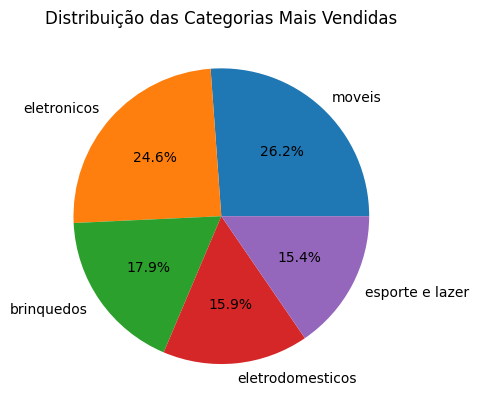

In [ ]:
categorias.head(5).plot(kind='pie', autopct='%1.1f%%', title='Distribuição das Categorias Mais Vendidas')
plt.ylabel('')
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
import matplotlib.pyplot as plt
avaliacao = dados_completos.groupby('Loja')['Avaliação da compra'].mean()

Médias de Avaliação por Loja:
Loja
Loja 1    3.98
Loja 2    4.04
Loja 3    4.05
Loja 4    4.00
Name: Avaliação da compra, dtype: float64


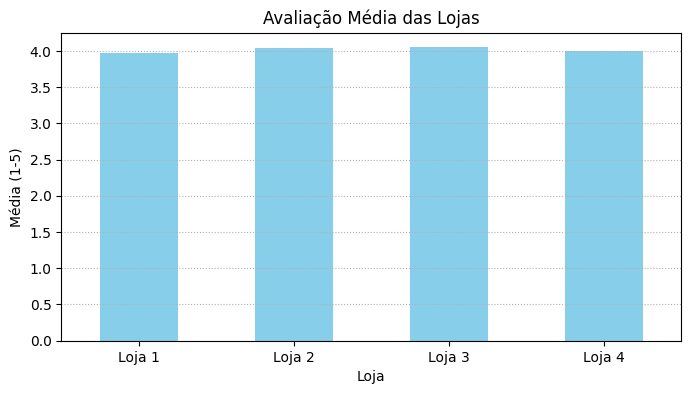

In [ ]:
print("Médias de Avaliação por Loja:")
print(avaliacao.round(2))


plt.figure(figsize=(8, 4))
avaliacao.plot(kind='bar', color='skyblue')
plt.title('Avaliação Média das Lojas')
plt.ylabel('Média (1-5)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle=':')
plt.show()

# 4. Produtos Mais e Menos Vendidos

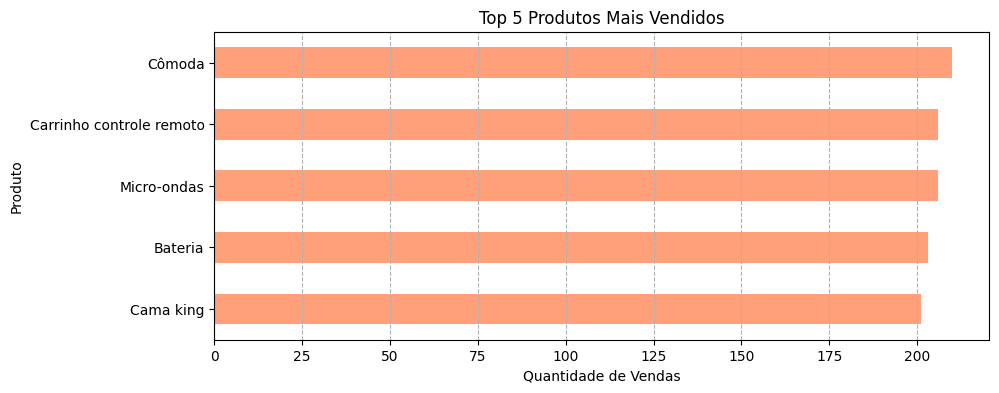

In [ ]:
top_produtos = dados_completos['Produto'].value_counts().nlargest(5)
plt.figure(figsize=(10, 4))
top_produtos.sort_values().plot(kind='barh', color='#FFA07A')
plt.title('Top 5 Produtos Mais Vendidos')
plt.xlabel('Quantidade de Vendas')
plt.grid(axis='x', linestyle='--')
plt.show()


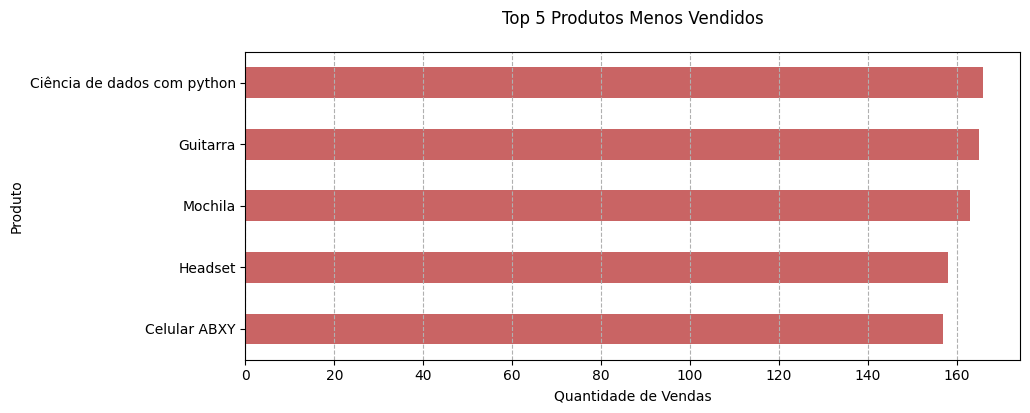

In [ ]:
bottom_produtos = dados_completos['Produto'].value_counts().nsmallest(5)
plt.figure(figsize=(10, 4))
bottom_produtos.sort_values().plot(kind='barh', color='#B22222', alpha=0.7)
plt.title('Top 5 Produtos Menos Vendidos', pad=20)
plt.xlabel('Quantidade de Vendas')
plt.grid(axis='x', linestyle='--')
plt.show()

# 5. Frete Médio por Loja


In [ ]:
frete_medio = dados_completos.groupby('Loja')['Frete'].mean()

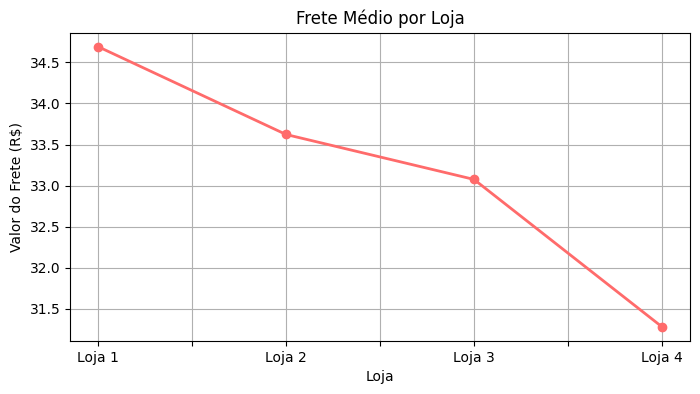

In [ ]:

plt.figure(figsize=(8, 4))
frete_medio.plot(kind='line', marker='o', color='#FF6B6B', linewidth=2)
plt.title('Frete Médio por Loja')
plt.ylabel('Valor do Frete (R$)')
plt.grid(True)
plt.show()